In [1]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

In [2]:
# %cd /content/MyDrive/MyDrive/ICG Comp


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets.mnist import load_data

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
print("x_train.shape is",x_train.shape)
print("x_test.shape is",x_test.shape)
print("y_train.shape is",x_train.shape)
print("y_test.shape is",y_test.shape)

x_train.shape is (60000, 28, 28)
x_test.shape is (10000, 28, 28)
y_train.shape is (60000, 28, 28)
y_test.shape is (10000,)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

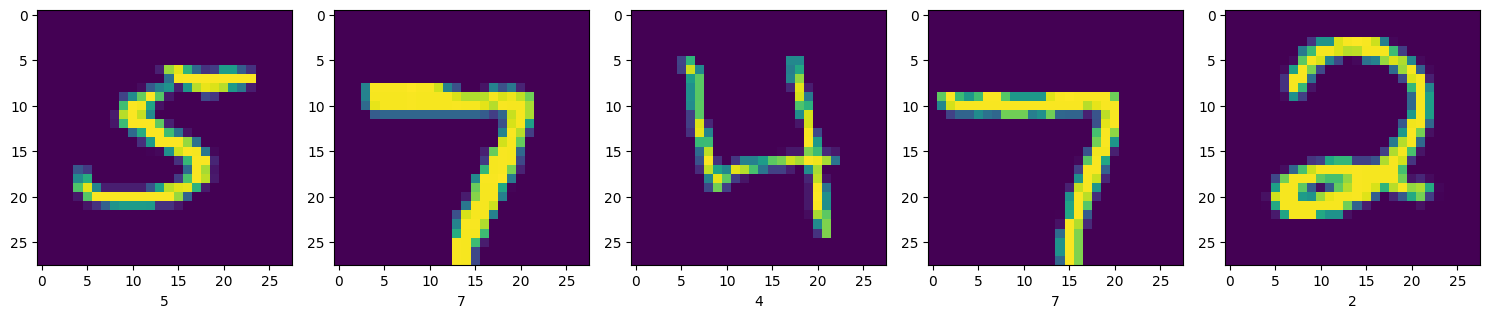

In [8]:
idc = np.random.randint(0,60000,size = 5)
plt.figure(figsize = (15,15))

for i in range(5):
  plt.subplot(1,5,i+1)
  j = idc[i]
  plt.imshow(x_train[j])
  plt.xlabel(y_train[j])
  plt.tight_layout()

In [9]:
one_inc = np.array(np.where(y_train == 1)[0])
zero_inc = np.array(np.where(y_train == 0)[0])

one_inc

array([    3,     6,     8, ..., 59979, 59984, 59994], dtype=int64)

In [10]:
len(one_inc)

6742

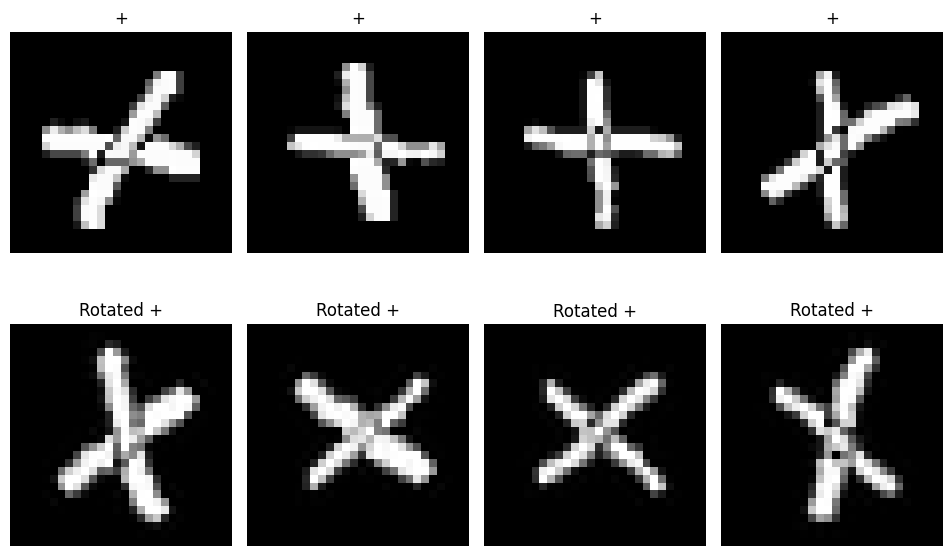

In [11]:
plt.figure(figsize = (12,6))
for i in range(4):
    j = one_inc[i]
    k = one_inc[i + 1]

    # Create an image by adding two original images
    img = x_train[j] + x_train[k].T

    # Plot the original image addition
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title('+')
    plt.axis('off')

    # Rotate the combined image by 45 degrees
    rotated_img = rotate(img, 45, reshape=False, mode='constant', cval=0)

    # Plot the rotated image addition
    plt.subplot(2, 5, i + 6)  # Use the next row of subplots
    plt.imshow(rotated_img, cmap='gray')
    plt.title('Rotated +')
    plt.axis('off')

plt.tight_layout()
plt.show()

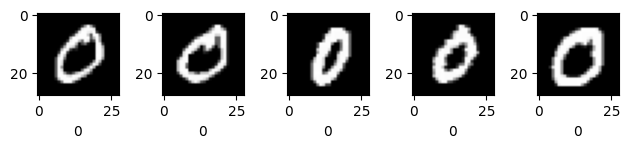

In [12]:
for i in range(5):
  plt.subplot(1,5,i+1)
  j = zero_inc[i]
  plt.imshow(x_train[j], cmap = 'gray')
  plt.xlabel(y_train[j])
  plt.tight_layout()

In [13]:
len(one_inc)

6742

In [14]:
len(zero_inc)

5923

In [15]:
len(np.where(y_test == 1)[0])

1135

In [16]:
len(np.where(y_test == 0)[0])

980

In [17]:
zeros = x_train[zero_inc] ##

In [18]:
import random

def select_random_pairs(m, n):
    if m > n * (n - 1) / 2:
        raise ValueError("Cannot select more pairs than available.")

    pairs = set()
    while len(pairs) < m:
        pair = (random.randint(0, n-1), random.randint(0, n-1))
        if pair[0] != pair[1] and pair not in pairs:
            pairs.add(pair)
    return list(pairs)


In [19]:
m = 1000  # Number of random pairs
n = 6742  # Range of integers from 0 to n-1
random_pairs = select_random_pairs(m, n)
print(random_pairs)

[(2195, 2912), (5971, 570), (5528, 1968), (6429, 3910), (1195, 3620), (3694, 495), (2943, 6445), (4757, 5236), (6538, 4091), (3195, 1989), (2371, 1453), (5223, 4477), (4404, 3391), (4455, 1487), (4832, 5257), (2941, 2054), (1665, 6242), (3098, 4280), (3811, 918), (3459, 5692), (3960, 2438), (5347, 4957), (3808, 5715), (1613, 1603), (3516, 3639), (4744, 4088), (5372, 1832), (2668, 778), (5924, 2354), (1565, 4699), (5230, 5302), (662, 2460), (4584, 6350), (5869, 3559), (886, 5960), (2419, 6300), (615, 2208), (2444, 5579), (1007, 1439), (2462, 5386), (3724, 4418), (5166, 1629), (5914, 5040), (5748, 2362), (4894, 2500), (3338, 1740), (163, 763), (642, 3250), (3386, 2598), (2928, 4511), (6338, 614), (3557, 94), (3089, 3534), (1849, 2791), (2779, 6328), (4328, 5453), (889, 5778), (3773, 5716), (989, 5060), (66, 5296), (95, 902), (2774, 1563), (4203, 5876), (6562, 5602), (3722, 557), (2797, 2468), (2197, 1259), (6540, 5462), (4087, 259), (4254, 3316), (3469, 2223), (1267, 3832), (3028, 2468),

In [20]:


def combine(array1,array2):
    shape = array1.shape

    # Initialize a new array with zeros
    result_array = np.zeros(shape)

    # Loop through the arrays and store the maximum values in the result array
    for i in range(shape[0]):
        for j in range(shape[1]):
            result_array[i][j] = max(array1[i][j], array2[i][j])
    return result_array
    # The result_array now contains the maximum values from the input arrays



In [21]:
# for i,j in random_pairs:
#   print(f"({i},{j})")

In [22]:
ones = []

for i,j  in random_pairs:
  img = combine(x_train[one_inc[i]],x_train[one_inc[j]].T)
  rotated_img = rotate(img, 45, reshape=False, mode='constant', cval=0)
  ones.append(rotated_img)


In [23]:
ones = np.array(ones)

In [24]:
print(zeros.shape,ones.shape)

(5923, 28, 28) (1000, 28, 28)


In [25]:
zeros = list(zeros)

In [26]:
indices = np.where(y_test == 0)[0]
i=0
while len(zeros) < 1000:
  zeros.append(x_test[indices[i]])
  i += 1

In [27]:
zeros = np.array(zeros)

In [28]:
zeros.shape

(5923, 28, 28)

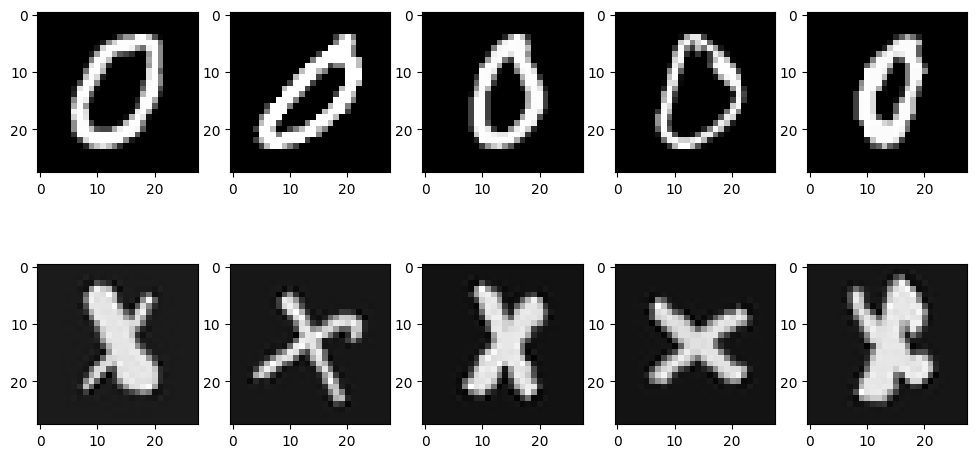

In [29]:
plt.figure(figsize = (12,6))

ind = np.random.randint(1000,size = 5)
for j in range(5):
  i = ind[j]
  plt.subplot(2,5,j+1)
  plt.imshow(zeros[i], cmap = 'gray')
  plt.subplot(2,5,j+6)
  plt.imshow(ones[i], cmap = 'gray')

Generating modified X and 0 

In [30]:
#new Xs
newCrosses = []
for i in range(len(ones)):
    img = combine(ones[i],zeros[i])
    newCrosses.append(img)
newCrosses = np.array(newCrosses)

In [31]:
newCrosses[1].shape

(28, 28)

In [32]:
#new 0s
newZeros = []
for i in range(len(zeros)):
    img = combine(x_train[one_inc[i]].T , zeros[len(zeros)-1-i])
    newZeros.append(img)
newZeros = np.array(newZeros)

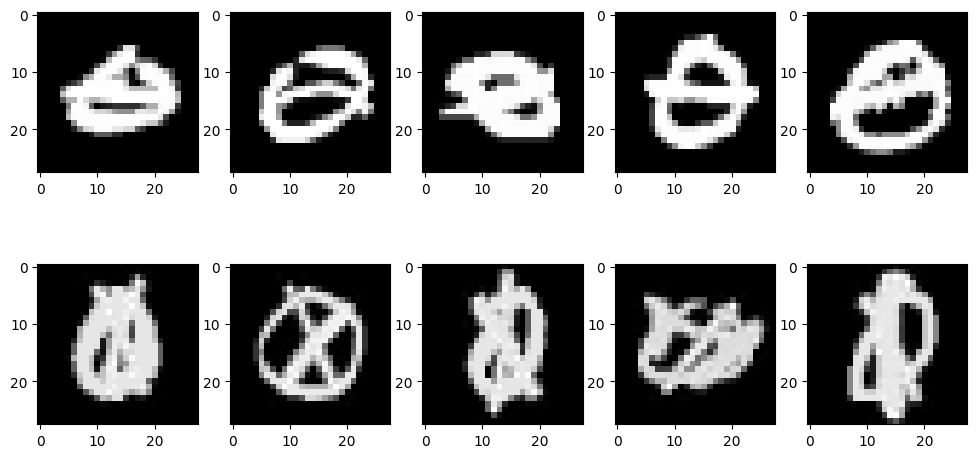

In [33]:
plt.figure(figsize = (12,6))

ind = np.random.randint(1000,size = 5)
for j in range(5):
  i = ind[j]
  
  plt.subplot(2,5,j+1)
  plt.imshow(newZeros[i], cmap = 'gray')
  plt.subplot(2,5,j+6)
  plt.imshow(newCrosses[i], cmap = 'gray')

In [34]:
import cv2

In [35]:
import os
os.makedirs('Modified_Images/crosses')
os.makedirs('Modified_Images/zeros')

In [36]:
for i in range(1000):
  cv2.imwrite(f'Modified_Images/crosses/{i}.png',newCrosses[i])
  cv2.imwrite(f'Modified_Images/zeros/{i}.png',newZeros[i])

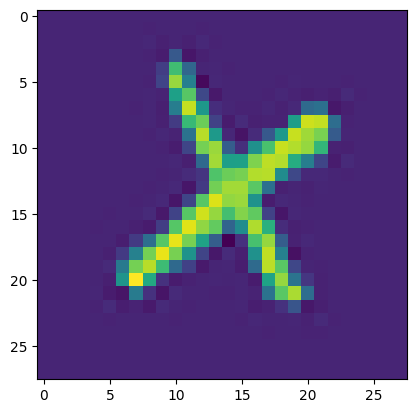

In [37]:
plt.imshow(ones[88])